In [1]:
import torch
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
values = np.loadtxt('data/vl5_data.csv')
t_u = torch.tensor(values[:,1])
t_c = torch.tensor(values[:,0])

In [3]:
def model(t_u, w, b):
    return w*t_u+b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.5 * n_samples)
print(f'gesamtanzahl = {n_samples}, validierungsanzahl = {n_val}')

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices)
print(val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

t_un = 0.1*t_u

gesamtanzahl = 11, validierungsanzahl = 5
tensor([ 1,  9, 10,  3,  6,  7])
tensor([2, 5, 0, 8, 4])


In [5]:
def training_loop(n_epochs, optimizer, train_t_u, train_t_c, val_t_u, val_t_c):
    loss_lin = np.zeros(n_epochs)
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params_lin)
        loss = loss_fn(train_t_p, train_t_c)
        # with torch.no_grad():
        #     params -= learning_rate * params.grad
        loss_lin[epoch-1] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0 or epoch == 1:
            val_t_p = model(val_t_u, *params_lin)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Loss %f, val-Loss %f' % (epoch, float(loss), float(val_loss)))
    return params_lin, loss_lin

Epoch 1, Loss 125.075983, val-Loss 16.861480
Epoch 500, Loss 4.545703, val-Loss 12.383499
Epoch 1000, Loss 2.086301, val-Loss 8.082254
Epoch 1500, Loss 1.871057, val-Loss 7.026608
Epoch 2000, Loss 1.852219, val-Loss 6.733290
Epoch 2500, Loss 1.850570, val-Loss 6.648184
Epoch 3000, Loss 1.850426, val-Loss 6.623145
Epoch 3500, Loss 1.850413, val-Loss 6.615753
Epoch 4000, Loss 1.850412, val-Loss 6.613575
Epoch 4500, Loss 1.850412, val-Loss 6.612922
Epoch 5000, Loss 1.850412, val-Loss 6.612844


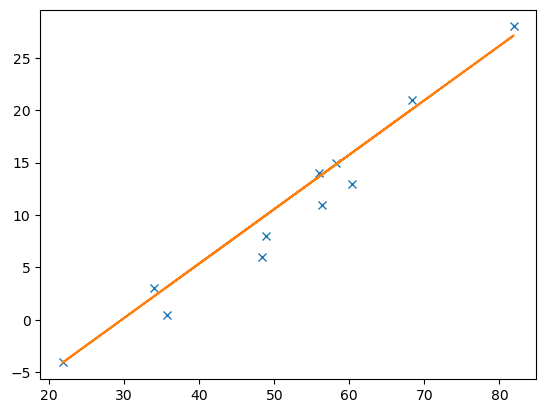

In [6]:
learning_rate = 1e-2

params_lin = torch.tensor([1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params_lin], lr=learning_rate)

t_p = model(t_u, *params_lin)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

# params = torch.tensor([1.0, 0.0], requires_grad=True)
params_lin, loss_lin = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    train_t_u = train_t_un, 
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)
plt.plot(t_u,t_c,'x')
t_p = model(t_un, params_lin[0], params_lin[1])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy())
plt.show()

In [7]:
def model_quad(t_u, w1,w2, b):
    return w2*(t_u**2)+w1*t_u+b

def loss_fn_quad(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

In [8]:
def training_loop_quad(n_epochs, optimizer, train_t_u, train_t_c, val_t_u, val_t_c):
    loss_quad = np.zeros(n_epochs)
    for epoch in range(1, n_epochs + 1):
        train_t_p = model_quad(train_t_u, *params_quad)
        loss = loss_fn(train_t_p, train_t_c)
        # with torch.no_grad():
        #     params -= learning_rate * params.grad
        loss_quad[epoch-1] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0 or epoch == 1:
            val_t_p = model_quad(val_t_u, *params_quad)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Loss %f, val-Loss %f' % (epoch, float(loss), float(val_loss)))
    return params_quad, loss_quad

Epoch 1, Loss 269.166667, val-Loss 83.534787
Epoch 500, Loss 5.180621, val-Loss 5.724907
Epoch 1000, Loss 3.623433, val-Loss 2.954632
Epoch 1500, Loss 3.369838, val-Loss 2.552976
Epoch 2000, Loss 3.139569, val-Loss 2.562573
Epoch 2500, Loss 2.878398, val-Loss 2.640538
Epoch 3000, Loss 2.601079, val-Loss 2.758507
Epoch 3500, Loss 2.327426, val-Loss 2.923117
Epoch 4000, Loss 2.079414, val-Loss 3.137867
Epoch 4500, Loss 1.876634, val-Loss 3.397172
Epoch 5000, Loss 1.730671, val-Loss 3.683153


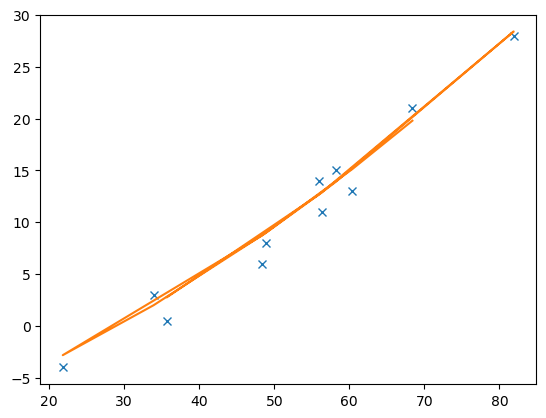

In [9]:
learning_rate = 1e-2

params_quad = torch.tensor([0.0,0.0,0.0], requires_grad=True)
optimizer = optim.Adam([params_quad], lr=learning_rate)

t_p = model_quad(t_u, *params_quad)
loss = loss_fn_quad(t_p, t_c)
optimizer.zero_grad()
loss.backward()

# params = torch.tensor([1.0, 0.0], requires_grad=True)
params_quad, loss_quad = training_loop_quad(
    n_epochs = 5000, 
    optimizer = optimizer,
    train_t_u = train_t_un, 
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)
plt.plot(t_u,t_c,'x')
t_p = model_quad(t_un, params_quad[0], params_quad[1],params_quad[2])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy())
plt.show()

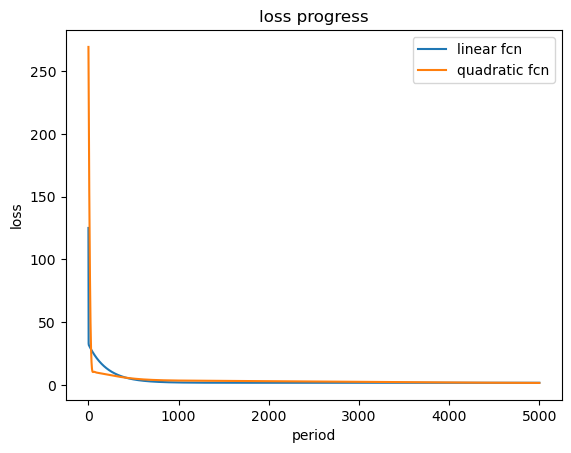

In [10]:
# plot the values of loss: 

epochs = np.arange(1, 5001, 1)

plt.plot(epochs, loss_lin,label = 'linear fcn')
plt.plot(epochs, loss_quad,label = 'quadratic fcn')
plt.legend()
plt.title("loss progress")
plt.xlabel("period")
plt.ylabel("loss")
plt.show()

1. Der "Loss" ist mit dem neuen Modell kleiner geworden.
2. Die "Regression" mit der quadratischen Funktion, sieht im Plot etwas merkwürdig aus, weshalb die mit der linearen Funktion besser passt. 